## Problem 1: Geocode shopping centers (5 points)

The overall aim of problems 1-3 is to find out **how many people live within a walking distance (1.5 km) from certain shopping centers in Helsinki**.

In problem 1 aim is to find out the addresses of shopping centers and to retreive numercal coordinates for these addresses. As an output, we will have a Shapefile called `shopping_centers.shp` which contains the geocoded result.

**Preparation:** Find out the addresses for following shopping centers from the internet, and write the addresses into a text file called `shopping_centers.txt`:

 - Itis
 - Forum
 - Iso-omena
 - Sello
 - Jumbo
 - REDI
 - Tripla 
 
 *Hint for "Tripla": This shopping center opened in October 10 2019, and if you are doing this exercise soon after that, the official address might not yet be in online databases. 
 Check for an address nearby the Pasila railway station on OpenStreetMap.org and use that as input.*

`shopping_centers.txt` should have semicolon (`;`) as a separator, and the file should include the following columns:

- ``id`` (integer) containing an unique identifier for each shopping center
- ``name`` (string) of each shopping center
- ``addr`` (string) the address 


See and example of how to format the text file [in the lesson 3 materials](https://automating-gis-processes.github.io/site/master/notebooks/L3/geocoding_in_geopandas.html). Save (and upload) the text file into your exercise repository.

- Read `shopping_centers.txt` that you just created into a pandas DataFrame called ``data``:

In [71]:
# Import modules
import os
import pandas as pd
import geopandas as gpd

def read_csv(path, sep=';'):
    assert os.path.isfile(path), 'Input must be valid file!'
    return pd.read_csv(path, sep=sep)

# Read the data (replace "None" with your own code)
data = read_csv('shopping_centers.txt')

# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
data.head()

,id,name,addr
0,0,Itis,"Itäkatu 1-7, 00930 Helsinki, Finland"
1,1,Forum,"Mannerheimintie 14-20, 00100 Helsinki, Finland"
2,2,Iso-Omena,"Piispansilta 11, 02230 Espoo, Finland"
3,3,Sello,"Leppävaarankatu 3-9, 02600 Espoo, Finland"
4,4,Jumbo,"Vantaanportinkatu 3, 01510 Vantaa"


In [72]:
#NON-EDITABLE TEST CELL
# Check your input data
print(data)

   id       name                                            addr
0   0       Itis            Itäkatu 1-7, 00930 Helsinki, Finland
1   1      Forum  Mannerheimintie 14-20, 00100 Helsinki, Finland
2   2  Iso-Omena           Piispansilta 11, 02230 Espoo, Finland
3   3      Sello       Leppävaarankatu 3-9, 02600 Espoo, Finland
4   4      Jumbo               Vantaanportinkatu 3, 01510 Vantaa
5   5       REDI            Hermannin rantatie 5, 00580 Helsinki
6   6     Tripla                 Pasilansilta 11, 00520 Helsinki


- Geocode the addresses using the Nominatim geocoding service. Store the output in a variable called `geo`:

In [73]:
from geopandas.tools import geocode

def geocode_nominatim(column):
    return geocode(column, provider='nominatim', user_agent='tech_lab_jibby', timeout=5)
    

# Geocode the addresses using Nominatim
geo = geocode_nominatim(data['addr'])

# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
geo.head()

,geometry,address
0,POINT (25.08130 60.21105),"Osuuspankki, 1-7, Itäkatu, Itäkeskus, Vartioky..."
1,POINT (24.93828 60.16878),"Salaattiasema, 14-20, Mannerheimintie, Keskust..."
2,POINT (24.73995 60.16040),"H&M, 11, Piispansilta, Matinkylä, Suur-Matinky..."
3,POINT (24.81355 60.21877),"Pakettiautomaatti, 3-9, Leppävaarankatu, Säter..."
4,POINT (24.96591 60.29044),"K-Citymarket Jumbo, 3, Vantaanportinkatu, Vant..."


In [74]:
#NON-EDITABLE TEST CELL
# Check the geocoded output
print(geo)

                    geometry  \
0  POINT (25.08130 60.21105)   
1  POINT (24.93828 60.16878)   
2  POINT (24.73995 60.16040)   
3  POINT (24.81355 60.21877)   
4  POINT (24.96591 60.29044)   
5  POINT (24.97890 60.18756)   
6  POINT (24.93433 60.19821)   

                                             address  
0  Osuuspankki, 1-7, Itäkatu, Itäkeskus, Vartioky...  
1  Salaattiasema, 14-20, Mannerheimintie, Keskust...  
2  H&M, 11, Piispansilta, Matinkylä, Suur-Matinky...  
3  Pakettiautomaatti, 3-9, Leppävaarankatu, Säter...  
4  K-Citymarket Jumbo, 3, Vantaanportinkatu, Vant...  
5  Yoga Valo, 5, Hermannin rantatie, Verkkosaari,...  
6  Pasilansilta, Keski-Pasila, Pasila, Keskinen s...  


In [75]:
#NON-EDITABLE TEST CELL
# Check the data type (should be a GeoDataFrame!)
print(type(geo))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [76]:
geo.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Check that the coordinate reference system of the geocoded result is correctly defined, and **reproject the layer into ETRS GK-25** (EPSG:3879):

In [77]:
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
geo.to_crs('EPSG:3879', inplace=True)

In [78]:
#NON-EDITABLE TEST CELL
# Check layer crs
print(geo.crs)

EPSG:3879


- Make a table join between the geocoded addresses (``geo``) and the original addresses (``data``) in order to link the numerical coordinates and  the `id` and `name` of each shopping center. 
- Store the output in a variable called ``geodata`` 


In [79]:
# Join the tables
geodata = geo.merge(data, left_index=True, right_index=True)

# REPLACE THE ERROR BELOW WITH YOUR OWN CODE

In [80]:
#NON-EDITABLE TEST CELL
# Check the join output
print(geodata.head())

                           geometry  \
0  POINT (25504507.835 6677589.882)   
1  POINT (25496573.542 6672878.360)   
2  POINT (25485559.440 6671971.772)   
3  POINT (25489665.027 6678461.731)   
4  POINT (25498114.526 6686432.573)   

                                             address  id       name  \
0  Osuuspankki, 1-7, Itäkatu, Itäkeskus, Vartioky...   0       Itis   
1  Salaattiasema, 14-20, Mannerheimintie, Keskust...   1      Forum   
2  H&M, 11, Piispansilta, Matinkylä, Suur-Matinky...   2  Iso-Omena   
3  Pakettiautomaatti, 3-9, Leppävaarankatu, Säter...   3      Sello   
4  K-Citymarket Jumbo, 3, Vantaanportinkatu, Vant...   4      Jumbo   

                                             addr  
0            Itäkatu 1-7, 00930 Helsinki, Finland  
1  Mannerheimintie 14-20, 00100 Helsinki, Finland  
2           Piispansilta 11, 02230 Espoo, Finland  
3       Leppävaarankatu 3-9, 02600 Espoo, Finland  
4               Vantaanportinkatu 3, 01510 Vantaa  


- Save the output as a Shapefile called `shopping_centers.shp` 

In [81]:
# Define output filepath
out_fp = 'shopping_centers.shp'

# Save file
geodata.to_file(out_fp)

# REPLACE THE ERROR BELOW WITH YOUR OWN CODE

C:\ProgramData\Anaconda3\envs\autogis_lesson2\lib\site-packages\geopandas\io\file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [82]:
#NON-EDITABLE TEST CELL
# Print info about output file
print("Geocoded output is stored in this file:", out_fp)

Geocoded output is stored in this file: shopping_centers.shp


## Problem 2: Create buffers around shopping centers (5 points)

Let's continue with our case study and calculate a 1.5 km buffer around the geocoded points. 


- Start by creating a new column called `buffer` to ``geodata`` GeoDataFrame:

In [83]:
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE


- Calculate a 1.5 km buffer for each geocoded point. Store the buffer geometry in the new `buffer` column.

Here, you can use the [GeoDataFrame buffer() method](http://geopandas.org/geometric_manipulations.html#GeoSeries.buffer), which uses Shapely's [buffer](http://toblerity.org/shapely/manual.html#object.buffer) in the bacground. You only need to use the `distance` -parameter, don't worry about the other parameters.

In [84]:
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
geodata['buffer'] = geodata.buffer(1500)

In [85]:
#NON-EDITABLE TEST CELL
print(geodata.head())

                           geometry  \
0  POINT (25504507.835 6677589.882)   
1  POINT (25496573.542 6672878.360)   
2  POINT (25485559.440 6671971.772)   
3  POINT (25489665.027 6678461.731)   
4  POINT (25498114.526 6686432.573)   

                                             address  id       name  \
0  Osuuspankki, 1-7, Itäkatu, Itäkeskus, Vartioky...   0       Itis   
1  Salaattiasema, 14-20, Mannerheimintie, Keskust...   1      Forum   
2  H&M, 11, Piispansilta, Matinkylä, Suur-Matinky...   2  Iso-Omena   
3  Pakettiautomaatti, 3-9, Leppävaarankatu, Säter...   3      Sello   
4  K-Citymarket Jumbo, 3, Vantaanportinkatu, Vant...   4      Jumbo   

                                             addr  \
0            Itäkatu 1-7, 00930 Helsinki, Finland   
1  Mannerheimintie 14-20, 00100 Helsinki, Finland   
2           Piispansilta 11, 02230 Espoo, Finland   
3       Leppävaarankatu 3-9, 02600 Espoo, Finland   
4               Vantaanportinkatu 3, 01510 Vantaa   

                   

In [86]:
#NON-EDITABLE TEST CELL
# Check the data type of the first value in the buffer-column
print(type(geodata.at[0,'buffer']))

<class 'shapely.geometry.polygon.Polygon'>


In [87]:
#NON-EDITABLE TEST CELL
# Check the areas of your buffers in km^2
print(round(gpd.GeoSeries(geodata["buffer"]).area / 1000000))

0    7.0
1    7.0
2    7.0
3    7.0
4    7.0
5    7.0
6    7.0
dtype: float64


- Replace the values in `geometry` column with the values of `buffer` column:

In [88]:
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
geodata['geometry'] = geodata['buffer']

In [89]:
#NON-EDITABLE TEST CELL
print(geodata.head())

                                            geometry  \
0  POLYGON ((25506007.835 6677589.882, 25506000.6...   
1  POLYGON ((25498073.542 6672878.360, 25498066.3...   
2  POLYGON ((25487059.440 6671971.772, 25487052.2...   
3  POLYGON ((25491165.027 6678461.731, 25491157.8...   
4  POLYGON ((25499614.526 6686432.573, 25499607.3...   

                                             address  id       name  \
0  Osuuspankki, 1-7, Itäkatu, Itäkeskus, Vartioky...   0       Itis   
1  Salaattiasema, 14-20, Mannerheimintie, Keskust...   1      Forum   
2  H&M, 11, Piispansilta, Matinkylä, Suur-Matinky...   2  Iso-Omena   
3  Pakettiautomaatti, 3-9, Leppävaarankatu, Säter...   3      Sello   
4  K-Citymarket Jumbo, 3, Vantaanportinkatu, Vant...   4      Jumbo   

                                             addr  \
0            Itäkatu 1-7, 00930 Helsinki, Finland   
1  Mannerheimintie 14-20, 00100 Helsinki, Finland   
2           Piispansilta 11, 02230 Espoo, Finland   
3       Leppävaarankatu 

Optional: at this point, you can drop out unnecessary columns from the geodataframe. In the next problem, 
we will only need these columns: `'id', 'name', 'geometry'`

In [90]:
geodata = geodata[['id', 'name', 'geometry']]
geodata.head()

,id,name,geometry
0,0,Itis,"POLYGON ((25506007.835 6677589.882, 25506000.6..."
1,1,Forum,"POLYGON ((25498073.542 6672878.360, 25498066.3..."
2,2,Iso-Omena,"POLYGON ((25487059.440 6671971.772, 25487052.2..."
3,3,Sello,"POLYGON ((25491165.027 6678461.731, 25491157.8..."
4,4,Jumbo,"POLYGON ((25499614.526 6686432.573, 25499607.3..."


<AxesSubplot:>

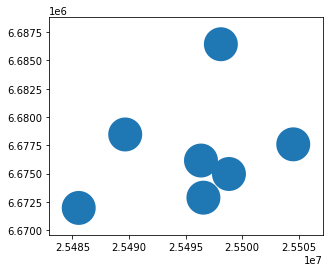

In [92]:
geodata.plot()

## Problem 3: How many people live near shopping centers? (5 points)

Last step in our analysis is to make a spatial join between our buffer layer and population data in order to find out **how many people live near each shopping center**. We will use the same data as we did during [lesson 3](https://automating-gis-processes.github.io/site/notebooks/L3/spatial-join.html#Spatial-join); **a Population Grid** that is available via the HSY wfs. 

Alternatively, you can also download the data from the [Helsinki Region Infoshare (HRI)](https://www.hsy.fi/fi/asiantuntijalle/avoindata/Sivut/AvoinData.aspx?dataID=7) as a shapefile (using wget).

The coordinate reference system of the population grid is **ETRS GK-25 (EPSG:3879)**.


**Steps:**

- Read the population grid into a geodataframe

- Select only the useful columns from the population grid: ``'asukkaita'`` (=population count per grid square) and ``'geometry'`` 

- Make a spatial join between your buffered point layer and population grid layer. Join the information now from buffer layer **into the population grid layer**

- Group the joined layer by shopping center index

- Calculate the sum of population living within 1.5 km for each shopping center.

**Finally:**

- Print out the population living within 1.5 km from each shopping center:

     - Itis
     - Forum
     - Iso-omena
     - Sello
     - Jumbo
     - REDI
     - Tripla
     
**Final print out should contain both the shopping center name and population count**, for example: `26532 people live within 1.5 km from Iso-Omena`.

*Feel free to divide your solution into several codeblocks! Remember to comment your code  :)*

In [93]:
# Read population grid data for 2018 into a variable `pop`. 
# Remember to check the crs info!
from pyproj import CRS
import requests
import geojson

# Specify the url for web feature service
url = 'https://kartta.hsy.fi/geoserver/wfs'

# Specify parameters (read data in json format). 
# Available feature types in this particular data source: http://geo.stat.fi/geoserver/vaestoruutu/wfs?service=wfs&version=2.0.0&request=describeFeatureType
params = dict(service='WFS', 
              version='2.0.0', 
              request='GetFeature', 
              typeName='asuminen_ja_maankaytto:Vaestotietoruudukko_2018', 
              outputFormat='json')

# Fetch data from WFS using requests
r = requests.get(url, params=params)

# Create GeoDataFrame from geojson
pop = gpd.GeoDataFrame.from_features(geojson.loads(r.content))


# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
pop.head()

,geometry,index,asukkaita,asvaljyys,ika0_9,ika10_19,ika20_29,ika30_39,ika40_49,ika50_59,ika60_69,ika70_79,ika_yli80
0,"POLYGON ((25472499.995 6689749.005, 25472499.9...",688,9,28.0,99,99,99,99,99,99,99,99,99
1,"POLYGON ((25472499.995 6685998.998, 25472499.9...",703,5,51.0,99,99,99,99,99,99,99,99,99
2,"POLYGON ((25472499.995 6684249.004, 25472499.9...",710,8,44.0,99,99,99,99,99,99,99,99,99
3,"POLYGON ((25472499.995 6683999.005, 25472499.9...",711,5,90.0,99,99,99,99,99,99,99,99,99
4,"POLYGON ((25472499.995 6682998.998, 25472499.9...",715,11,41.0,99,99,99,99,99,99,99,99,99


In [95]:
pop.set_crs(epsg=3879,inplace=True)
pop.crs

<Projected CRS: EPSG:3879>
Name: ETRS89 / GK25FIN
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Finland - 24.5°E to 25.5°E onshore nominal
- bounds: (24.5, 59.94, 25.5, 68.9)
Coordinate Operation:
- name: Finland Gauss-Kruger zone 25
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [96]:
pop.crs == geodata.crs

True

In [97]:
pop = pop.rename(columns={'asukkaita': 'pop_count'})
outfile = 'Vaestotietoruudukko_2018'
pop.to_file(outfile)
pop = pop[['pop_count', 'geometry']]
pop.head()

C:\ProgramData\Anaconda3\envs\autogis_lesson2\lib\site-packages\geopandas\io\file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


,pop_count,geometry
0,9,"POLYGON ((25472499.995 6689749.005, 25472499.9..."
1,5,"POLYGON ((25472499.995 6685998.998, 25472499.9..."
2,8,"POLYGON ((25472499.995 6684249.004, 25472499.9..."
3,5,"POLYGON ((25472499.995 6683999.005, 25472499.9..."
4,11,"POLYGON ((25472499.995 6682998.998, 25472499.9..."


In [98]:
#NON-EDITABLE TEST CELL
# Check your input data
print("Number of rows:", len(pop))
print(pop.head(3))

Number of rows: 5832
   pop_count                                           geometry
0          9  POLYGON ((25472499.995 6689749.005, 25472499.9...
1          5  POLYGON ((25472499.995 6685998.998, 25472499.9...
2          8  POLYGON ((25472499.995 6684249.004, 25472499.9...


In [99]:
# Create a spatial join between grid layer and buffer layer. 

# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
join = gpd.sjoin(pop, geodata, how='inner', op='within')
print(len(join))
join.head()

428


,pop_count,geometry,index_right,id,name
1155,78,"POLYGON ((25484250.000 6672249.006, 25484250.0...",2,2,Iso-Omena
1156,16,"POLYGON ((25484250.000 6671748.997, 25484250.0...",2,2,Iso-Omena
1216,114,"POLYGON ((25484499.998 6672749.004, 25484499.9...",2,2,Iso-Omena
1217,128,"POLYGON ((25484499.998 6672499.005, 25484499.9...",2,2,Iso-Omena
1218,83,"POLYGON ((25484499.998 6672249.006, 25484499.9...",2,2,Iso-Omena


In [101]:
# group by shopping data index
grouped = join.groupby('name').sum()

In [102]:
grouped.head()

,pop_count,index_right,id
name,,,
Forum,56891,76,76
Iso-Omena,25846,162,162
Itis,20367,0,0
Jumbo,10862,176,176
REDI,25239,185,185


In [111]:
type(grouped)

geopandas.geodataframe.GeoDataFrame

In [121]:
# Report how many people live within 1.5 km distance from each shopping center
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
for key, value in zip(list(grouped.keys()), list(grouped.items())):
    print(f"{value} people live within 1.5km of the {key} shopping center")

('pop_count', name
Forum        56891
Iso-Omena    25846
Itis         20367
Jumbo        10862
REDI         25239
Sello        22747
Tripla       24163
Name: pop_count, dtype: int64) people live within 1.5km of the pop_count shopping center
('index_right', name
Forum         76
Iso-Omena    162
Itis           0
Jumbo        176
REDI         185
Sello        186
Tripla       324
Name: index_right, dtype: int64) people live within 1.5km of the index_right shopping center
('id', name
Forum         76
Iso-Omena    162
Itis           0
Jumbo        176
REDI         185
Sello        186
Tripla       324
Name: id, dtype: int64) people live within 1.5km of the id shopping center


**Reflections:**
    
- How challenging did you find problems 1-3 (on scale to 1-5), and why?
- What was easy?
- What was difficult?

YOUR ANSWER HERE: YES!

Well done! Now you can continue to [problem 4](Exercise-3-Problem-4.ipynb)